In [5]:
import numpy as np
import matplotlib.pyplot as plt

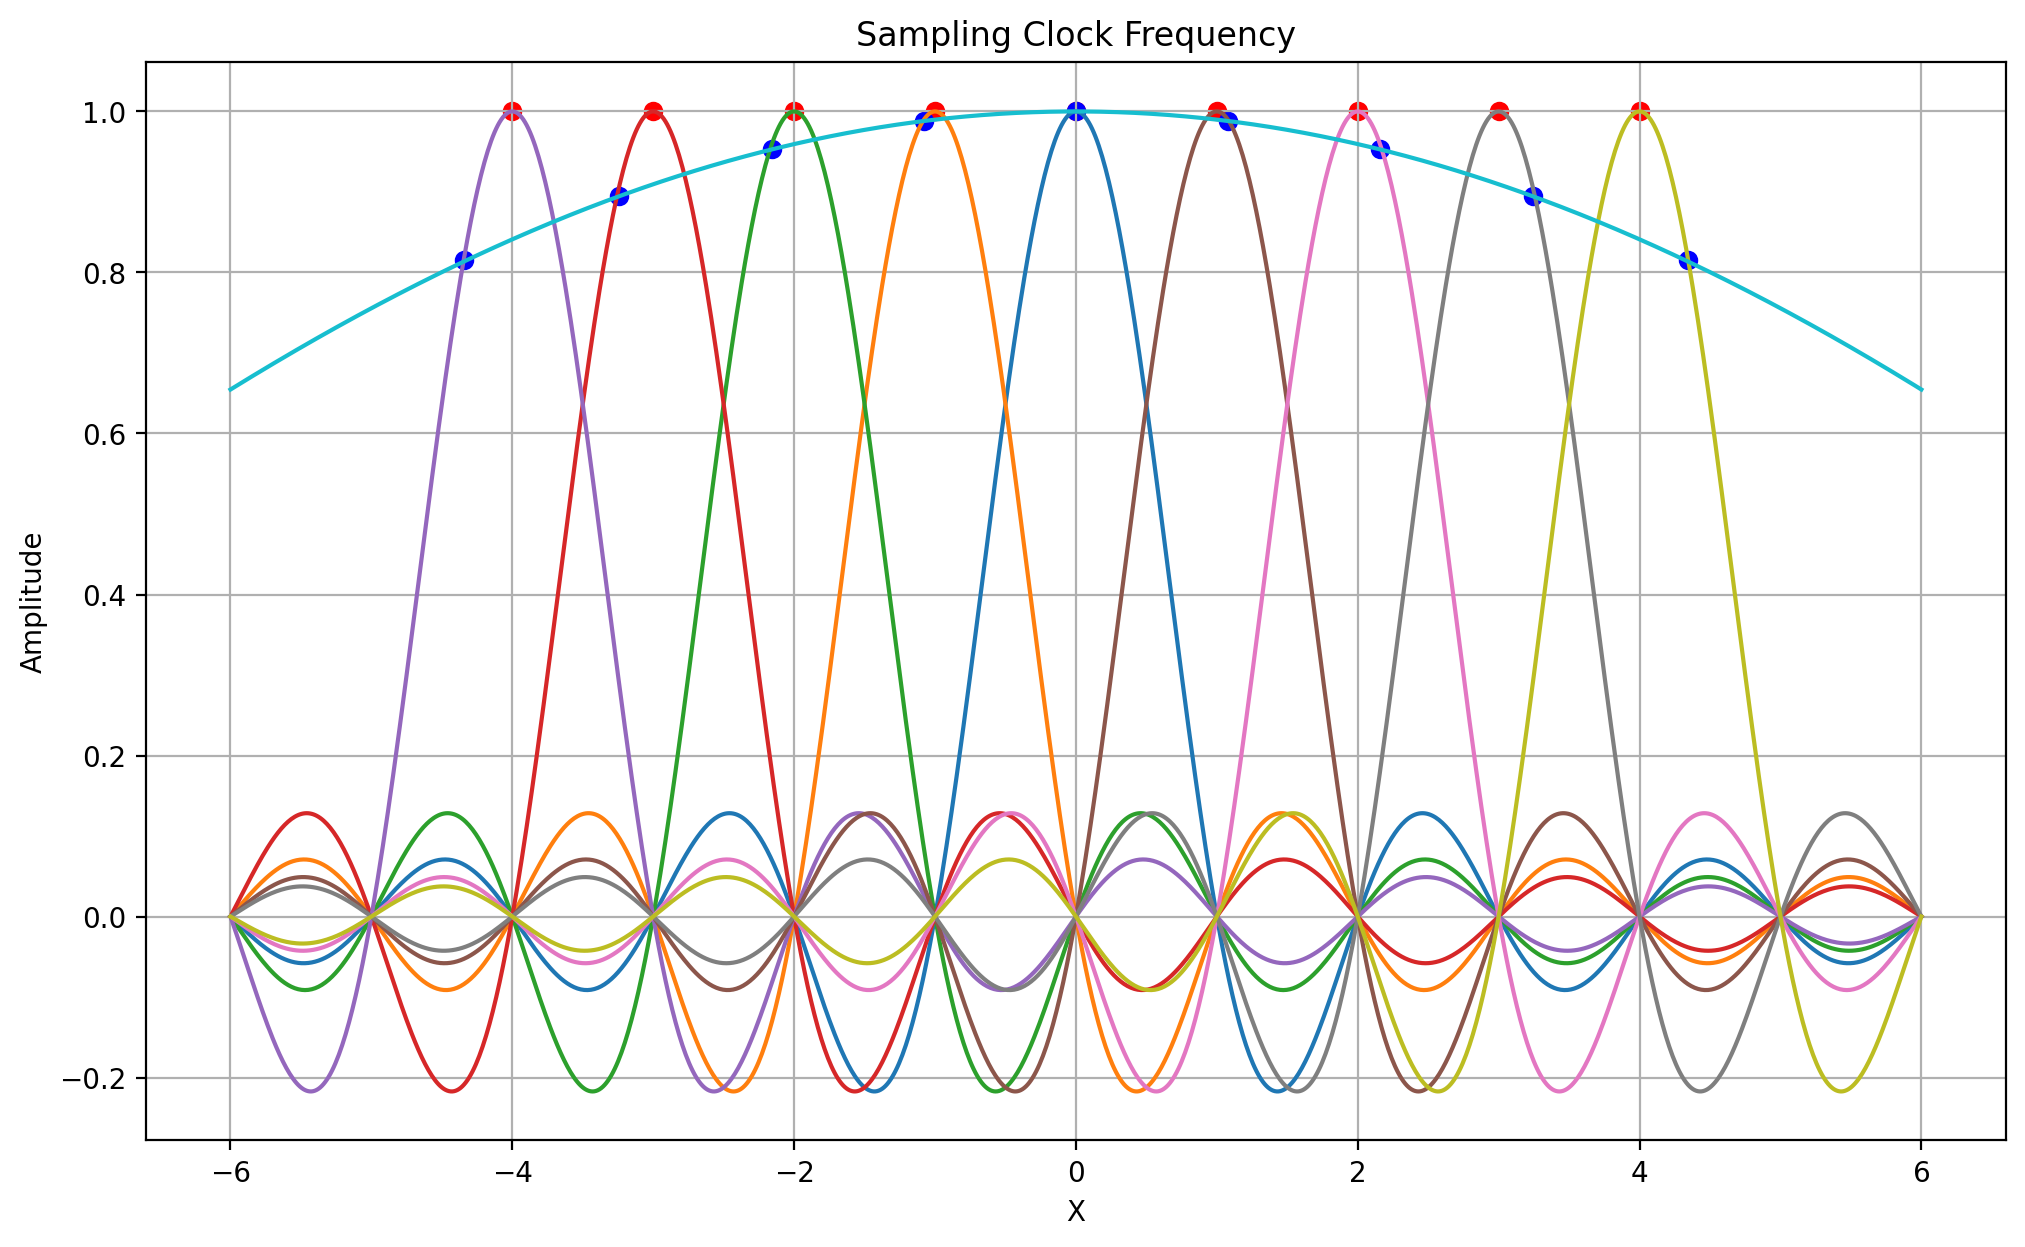

In [57]:
x = np.linspace(-6, 6, 1000)
y = np.sinc(x)
y1 = np.sinc(x+1)
y2 = np.sinc(x+2)
y3 = np.sinc(x+3)
y4 = np.sinc(x+4)
y_1 = np.sinc(x-1)
y_2 = np.sinc(x-2)
y_3 = np.sinc(x-3)
y_4 = np.sinc(x-4)
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y_1)
plt.plot(x, y_2)
plt.plot(x, y_3)
plt.plot(x, y_4)
plt.plot(x, np.cos(x/7))
plt.title("Sampling Clock Frequency")
plt.ylabel("Amplitude")
plt.xlabel("X")
plt.grid()
plt.scatter([-4, -3, -2, -1, 0, 1, 2, 3, 4], [1, 1, 1, 1, 1, 1, 1, 1, 1], color='r')
plt.scatter([-4.345, -3.245, -2.155, -1.08, 0, 1.08, 2.155, 3.245, 4.345], [0.815, 0.895, 0.953, 0.988, 1, 0.988, 0.953, 0.895, 0.815], color='b')
plt.show()

[223 228 124 143 172  16 205 184 245 211 194  87]


Symbol start sample index = 73
[223 228 124 143 172  16 205 184 245 211 194  87]


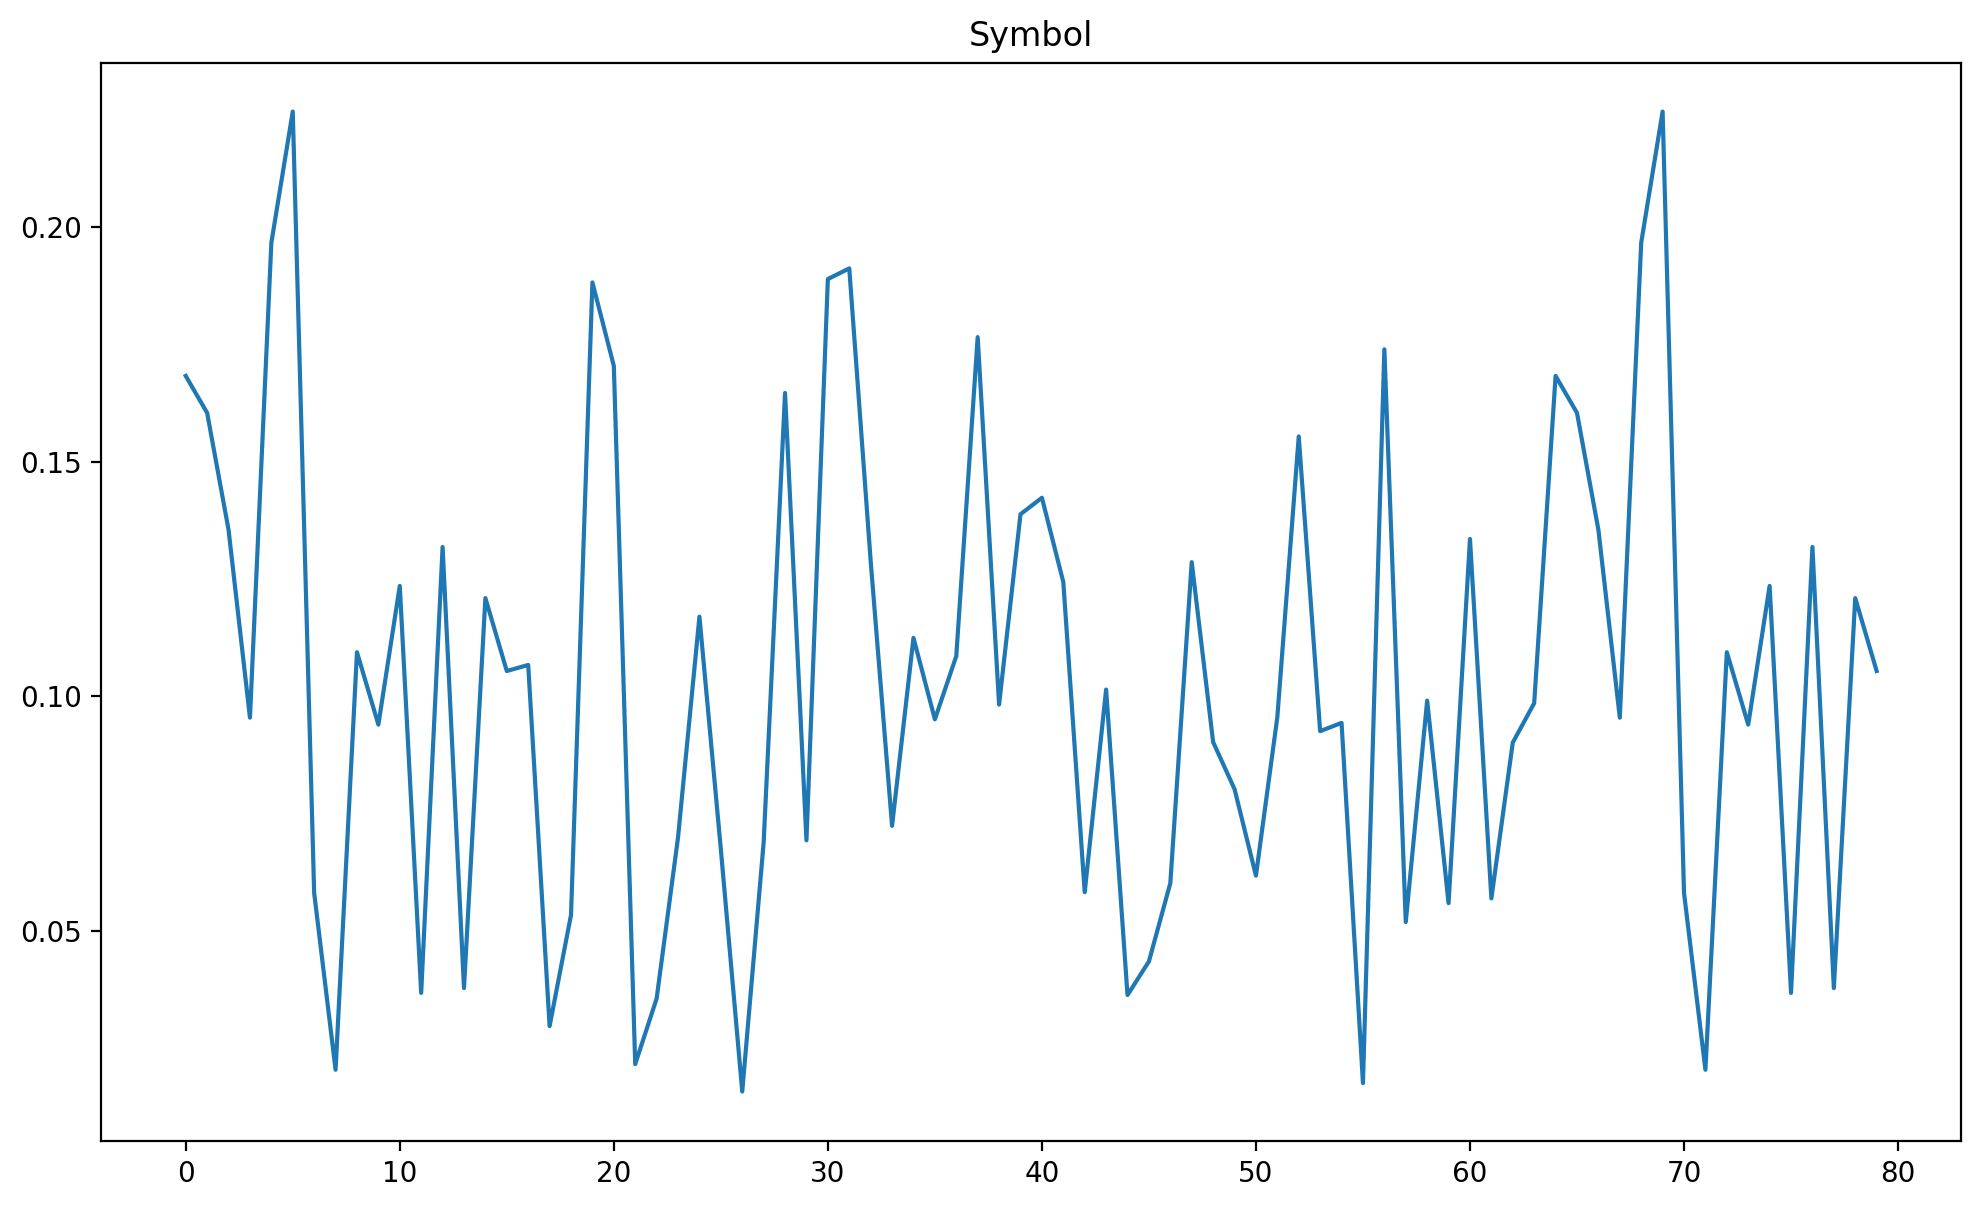

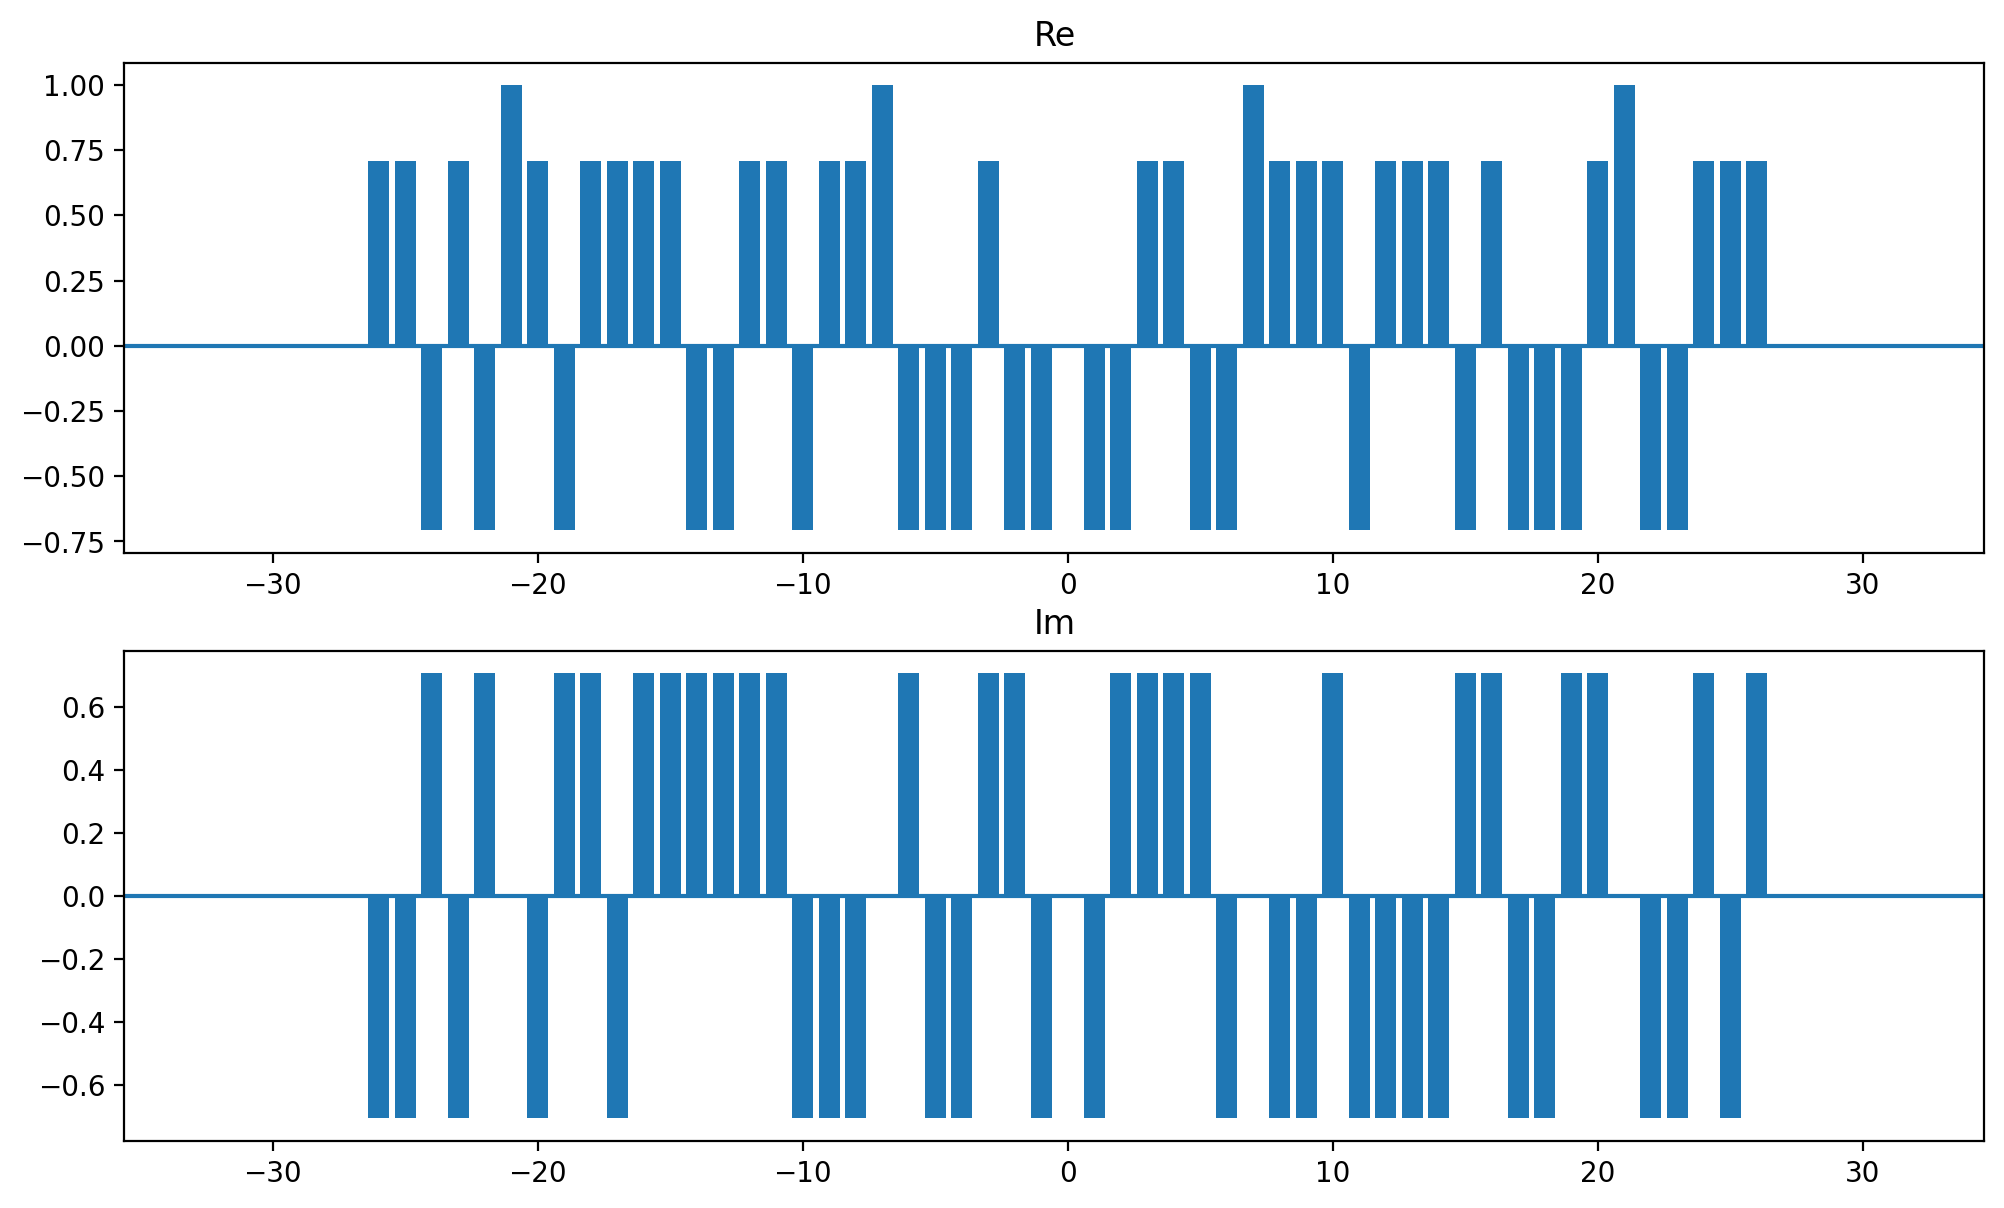

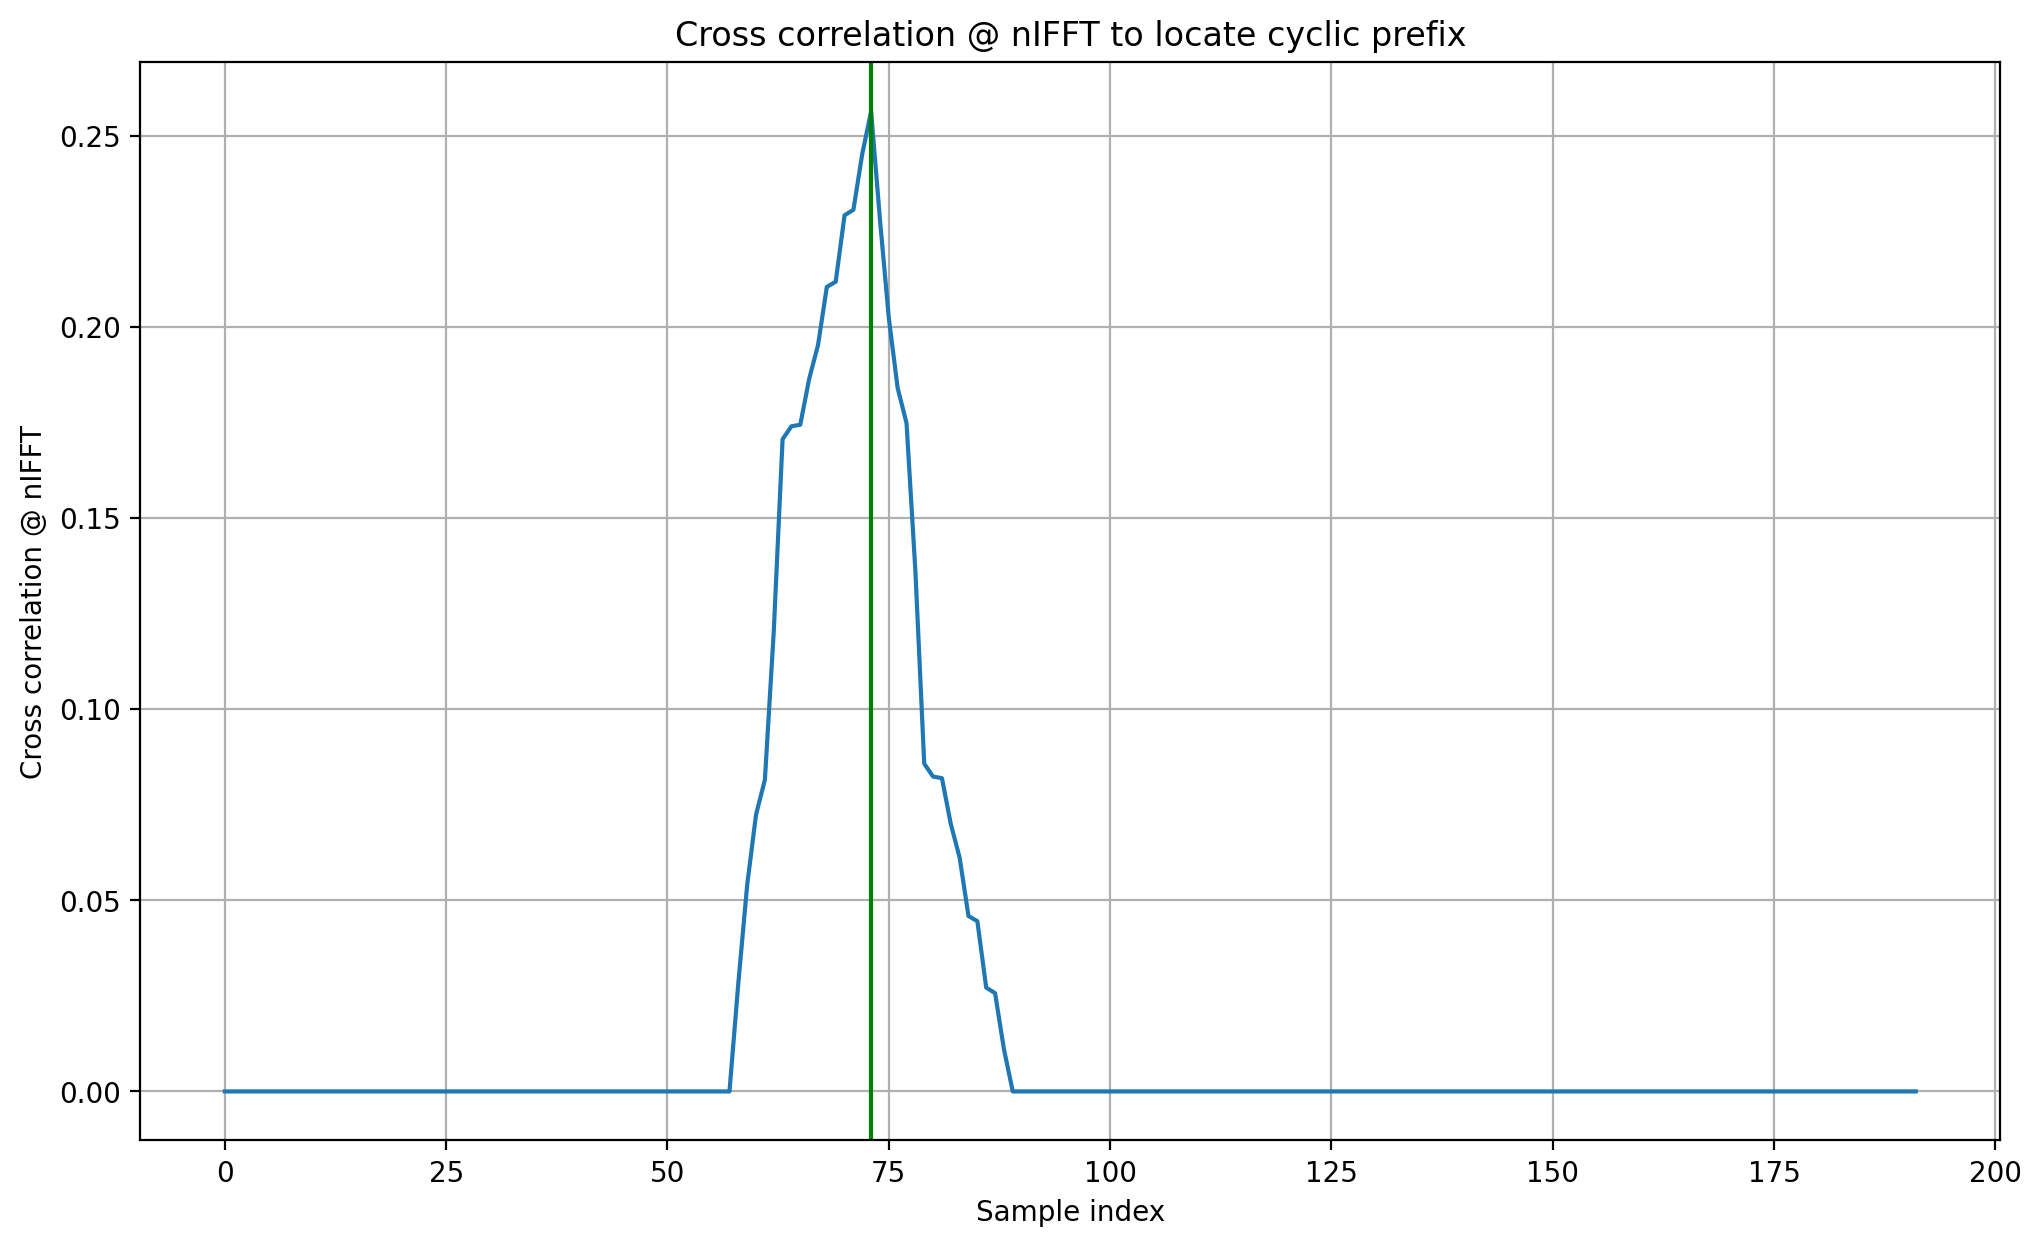

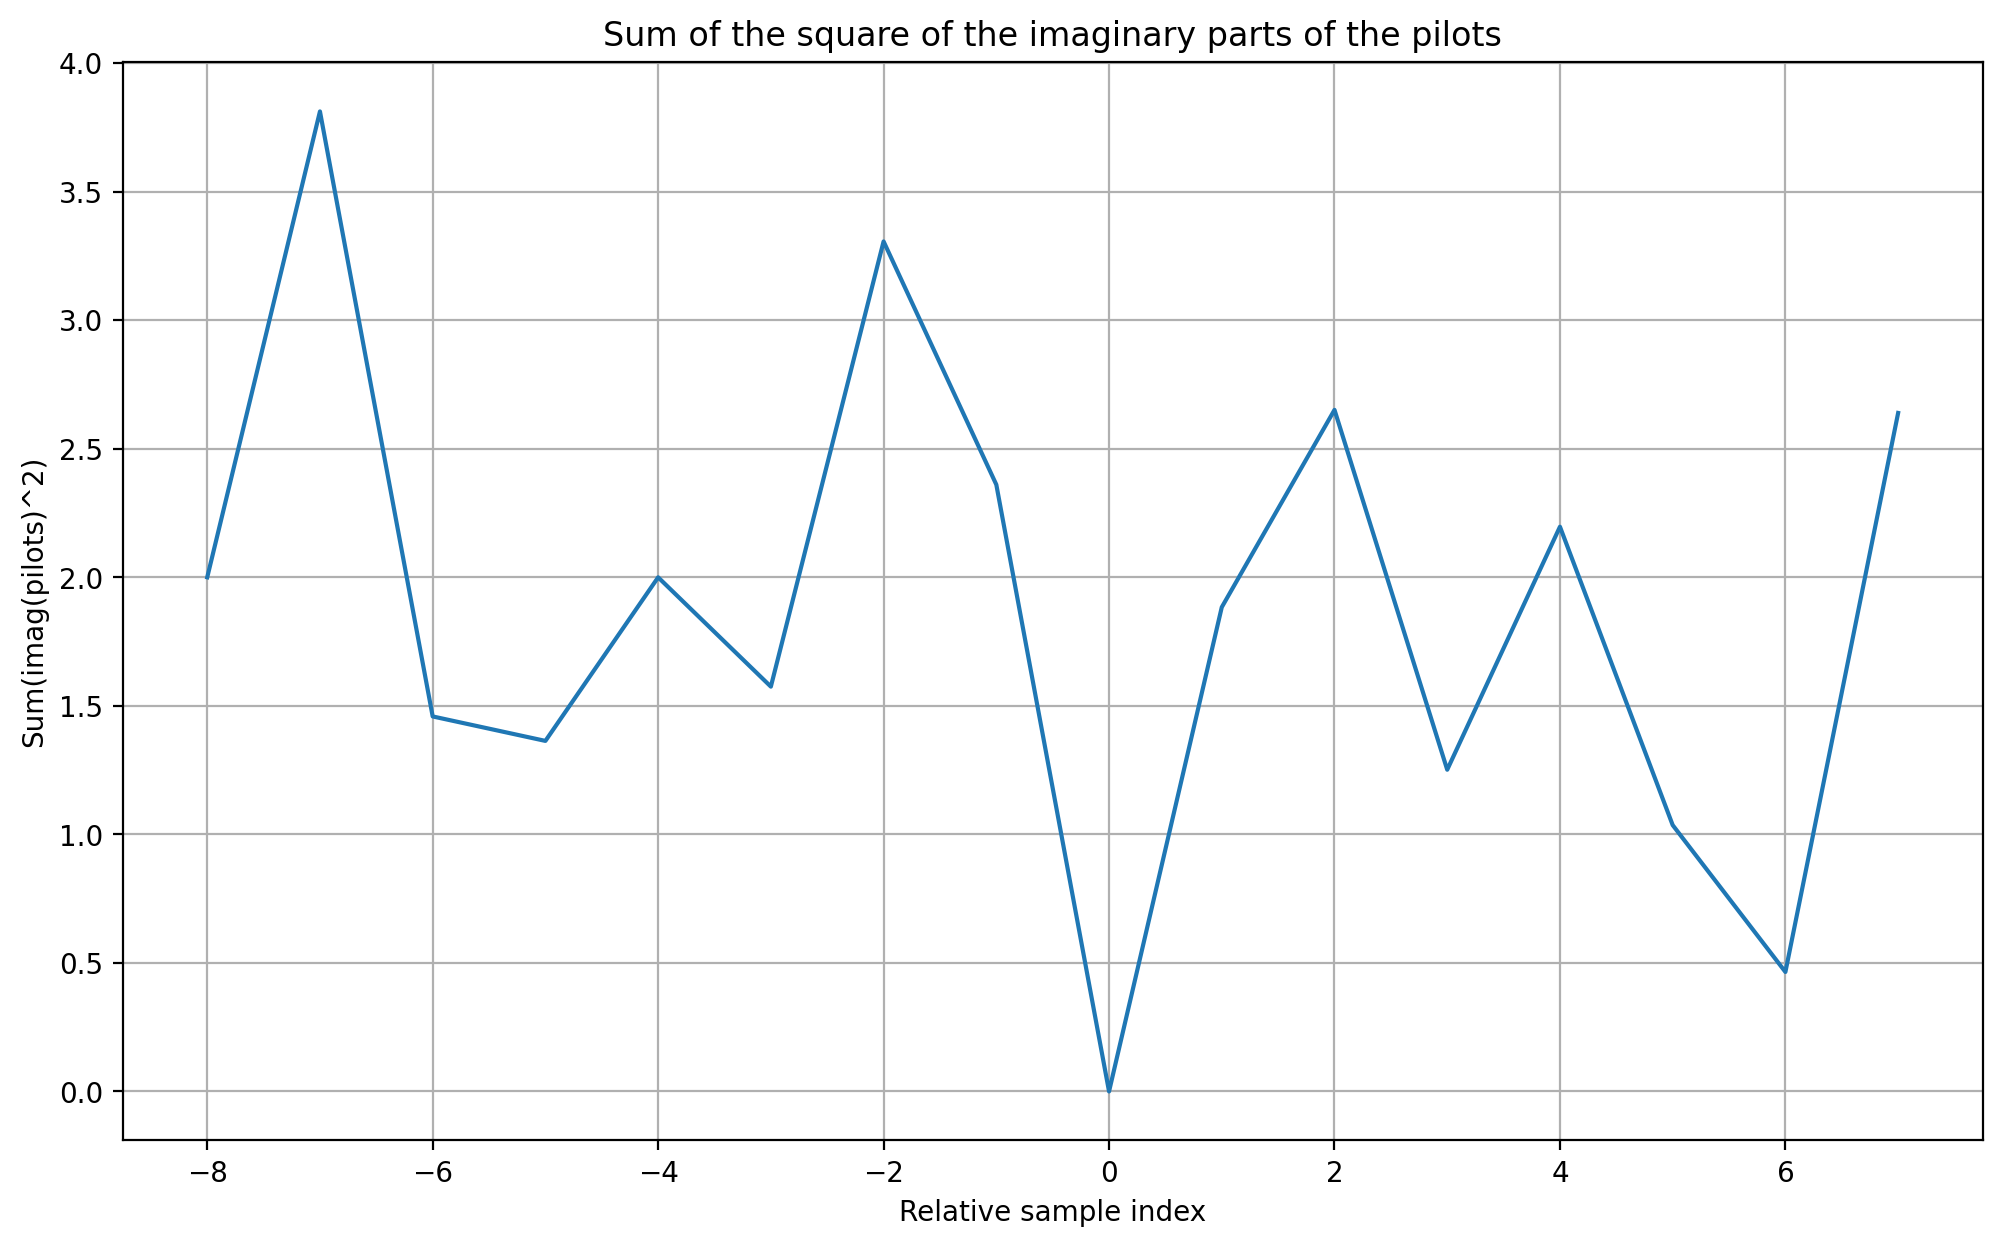

In [61]:
import pyofdm.codec

ofdm = pyofdm.codec.OFDM(pilotAmplitude = 1,nData=12,mQAM=2)
signal = np.empty(0)

row = np.random.randint(256,size=12,dtype='uint8')
print(row)
signal = np.append(signal,ofdm.encode(row))

plt.figure()
plt.title("Symbol")
plt.plot(np.abs(signal))

# Show negative frequency components as negative, rather than upper half
myfreqs = (np.arange(ofdm.nIFFT)+ofdm.nIFFT//2)%ofdm.nIFFT-ofdm.nIFFT//2
fig, axs = plt.subplots(2,1)
axs[0].bar(myfreqs,ofdm.spectrum.real)
axs[0].axhline()
axs[0].set_title("Re")
axs[1].bar(myfreqs,ofdm.spectrum.imag)
axs[1].axhline()
axs[1].set_title("Im")

#######################################################################
# reception

# Let's add some dummy zero data to the signal

dummy = np.zeros(np.random.randint(low=1*ofdm.nIFFT,high=2*ofdm.nIFFT),dtype=complex)
signal = np.append(dummy, signal)
dummy = np.zeros(2*ofdm.nIFFT,dtype=complex)
signal = np.append(signal, dummy)

searchRangeForPilotPeak = 8
cc, sumofimag, offset = ofdm.findSymbolStartIndex(signal,
    searchrangefine = searchRangeForPilotPeak)

print("Symbol start sample index =",offset)

plt.figure()
plt.title("Cross correlation @ nIFFT to locate cyclic prefix")
plt.xlabel("Sample index")
plt.ylabel("Cross correlation @ nIFFT")
plt.plot(cc)
plt.grid()
plt.axvline(x=offset,color='g')

plt.figure()
plt.title("Sum of the square of the imaginary parts of the pilots")
plt.xlabel("Relative sample index")
plt.ylabel("Sum(imag(pilots)^2)")
plt.grid()
plt.plot(np.arange(-searchRangeForPilotPeak,searchRangeForPilotPeak),sumofimag)

ofdm.initDecode(signal,offset)

rx_enc = ofdm.decode()[0]
print(rx_enc)
plt.show()